# Fall 2025 Week 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import all the functions from the Utility_functions.py file
from Utility_functions import *

## Single Period Random Cash flow

### Review of Probability
Let $X$ be a discrete random variable with possible values $x_1,\ldots, x_n$. We define its **expected value**
$$E[X] = \sum_1^n x_i P(X = x_i)$$
and **variance**
$$\text{Var}(X) = E[(X-E[X])^2] = E[X^2] - E[X]^2$$

They have the following properties
$$E[aX+bY+c] = aE[X]+bE[Y]+c$$
$$\text{Var}(aX+b) = a^2\text{Var}(X)$$

Let $X, Y$ be two random variables, we define the **covariance of** $X, Y$ to be 
$$\text{Cov}(X, Y) = E[(X-E[X])(Y-E[Y])] = E[XY] - E[X]E[Y]$$

The covariance is a bilinear positive semi-definite symmetric form (i.e, it is an inner product), satisfying the properties 
$$\text{Cov}(X, Y) = \text{Cov}(Y, X)$$
$$\text{Cov}(\sum_1^n X_i, \sum_1^nX_i) = \sum_{i,j}\text{Cov}(X_i, X_j)$$

By Cauchy-Schwarz inequality, we can show that 
$$|\text{Cov}(X,Y)|\leq \sqrt{Var(X)}\sqrt{Var(Y)}$$
and the equality holds if $Y$ is a scalar multiple of $X$. 

We say two random variables are **uncorrelated** if their covariance is zero. In particular, independent random variables are uncorrelated. However, there are random variables which are dependent, but uncorrelated. 

We define the **Pearson correlation coefficient** as 
$$\rho_{X,Y} = \frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}.$$
Then we have $\rho_{X,Y}\in [-1, 1]$, and $\rho_{X,Y} = \pm 1$ if and only if $X=\pm c\cdot Y$ where $c$ is a positive number.

By the bilinearlity of covariance, we can show that 
$$\text{Var}(X+Y) = \text{Cov}(X+Y, X+Y) = \text{Var}(X)+\text{Var}(Y) + 2\text{Cov}(X, Y)$$

### Total return and return rate
We consider a single-period investment, which consists of initial investment $X_0$, and final payment $X_1$. We define the **total return** as 
$$R = \frac{X_1}{X_0}$$
and the **return rate**
$$r = \frac{X_1-X_0}{X_0} = R-1$$

Consider a portfolio consisting of $n$ investments, where the initial investment are $X_{0, i}$ and the final payment is $X_{1, i}$. Let $R_i$ and $r_i$ be the total return and return rate of each investment, and $X_0 = \sum_1^n X_{0, i}, X_n = \sum_1^n X_{1, i}$. Let $R, r$ be the total return, and retun rate of this portfolio. Let $w_i = \frac{X_{0,i}}{X_0}$ be the weight of each investment. Then, we have
$$R = \frac{\sum_1^n X_{1, i}}{X_0} = \frac{\sum_1^n w_iX_0R_i}{X_0} = \sum_1^n w_i R_i$$
$$r = R-1 = \sum_1^n w_iR_i - \sum_1^n w_i = \sum_1^n w_i (R_{i}-1) = \sum_1^n w_i r_i$$

In summary, the total return and return rate of a portfolio is a weighted sum of the total return and return rate of each asset in the portfolio, where the weight is the relative cost in the portfolio. 

**Example**
Let $X, Y$ be independent normal distribution with mean $0$ and variance $1$. Show that $(X, \rho X+\sqrt{1-\rho^2}Y)$ has correlation coefficient $\rho$.

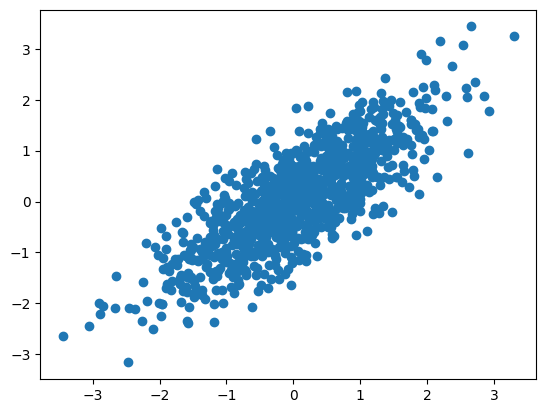

[[1.         0.80344448]
 [0.80344448 1.        ]]
[[ 1.         -0.01507892]
 [-0.01507892  1.        ]]


In [7]:
n = 1000
rho = 0.8
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
Z = rho * X + np.sqrt(1-rho**2) * Y
plt.scatter(X, Z)
plt.show()
print(np.corrcoef(X, Z))
print(np.corrcoef(X, Y))

## Mean-Variance Portfolio theory

- Now the cash flow is not deterministic, like stock.
- Instead of looking at a single stock, we look at "a lot" of stocks in the market.
- Target: Maximize 'Profit' and Minimize the 'Risk' at the same time.

### What is 'Profit'?
If we look at the single period return of a single stock, it is not fixed. In fact, you can regard it as a random variable. So the average return, is given by its **Mean**.

### What is 'Risk'?
For a given stock, although its average return, or, **Mean** can be very large. But maybe at the same time, it may have a larger change to have very small, even very negative, return. As a risk netural or risk aversion investor, you want somehow steady return with small risk, then the value of the random variable should be more 'Concentrate' around its mean. So the 'Risk' is given by its **Variance**.

## Example: Simple linear relation

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/nh/dws0vwzj5j7g_y6yk7z_67zh0000gn/T/ipykernel_75578/2006982596.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Sampled Linear Relation Model with variance \sigma^2 = {sigma**2}')


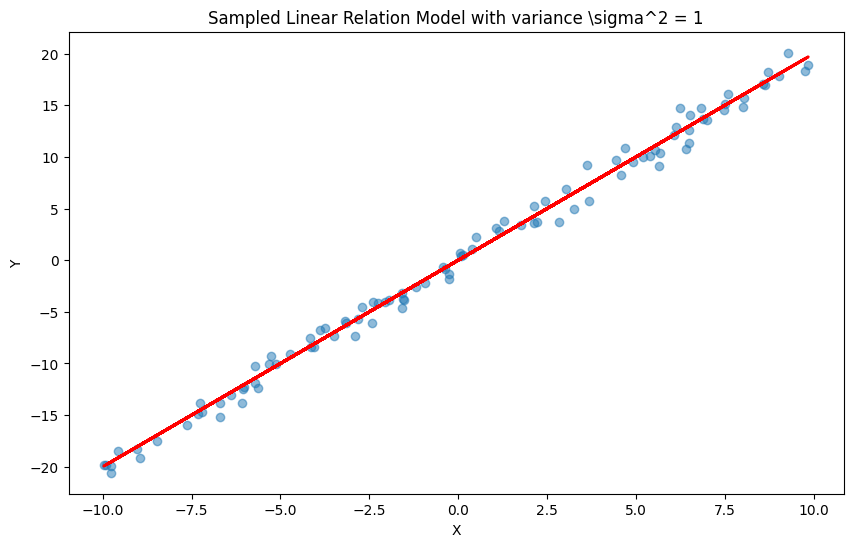

In [3]:
# Plot the linear regression model
plt.figure(figsize=(10, 6))
n = 100
beta = 2
sigma = 1
X = np.random.uniform(-10, 10, n)
Y = beta * X + np.random.normal(0, sigma, n)
plt.scatter(X, Y, alpha=0.5)
plt.plot(X, beta * X, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Sampled Linear Relation Model with variance \sigma^2 = {sigma**2}')
plt.show()


Now, our job is clear. Mathematically, we need to **Maximize the mean** of the portfolio and **Minimize the variance**.

## Exercise 6.4
(Two stocks) Two stocks are available. The corresponding expected rates of return are $\overline{r_1}$ and $\overline{r_2}$; the corresponding variances and covariances are $\sigma_1^2$, $\sigma_2^2$, and $\sigma_{12}$. What percentages of total investment should be invested in each of the two stocks to minimize the total variance of the rate of return of the resulting portfolio? What is the mean rate of return of this portfolio?

### Solution:
We can take a look at the efficient frontier of two stocks.

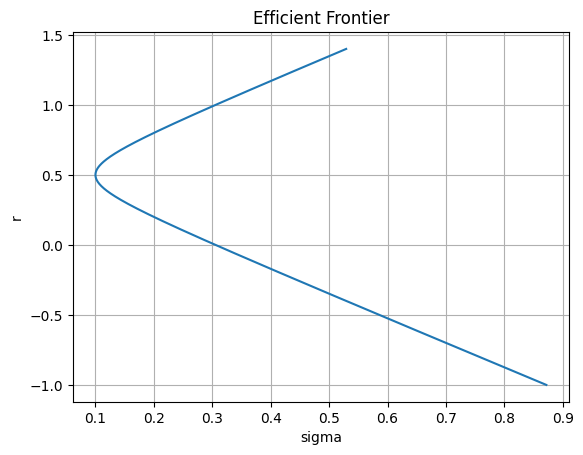

In [8]:
sigma1 = 0.1
sigma2 = 0.2
r1 = 0.5
r2 = 0.2
rho = 0.5
sigma12 = rho * sigma1 * sigma2

def r(alpha):
    return alpha * r1 + (1 - alpha) * r2

def sigma(alpha):
    return np.sqrt(alpha**2 * sigma1**2 + (1-alpha)**2 * sigma2**2 + 2 * alpha * (1-alpha) * sigma12)

alpha = np.linspace(-4, 4, 1000)

rlist = r(alpha)
sigmalist = sigma(alpha)

plt.plot(sigmalist, rlist)
plt.xlabel('sigma')
plt.ylabel('r')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


Mathematically, this can be solved using the following:
Suppose the weight for stock $1$ is $\alpha$, and the weights for stock $2$ is $1-\alpha$. We want to minimize the function 
$$\alpha^2\sigma_1^2+(1-\alpha)^2\sigma_2^2+2\alpha(1-\alpha)\sigma_{12}$$
This is a concave up quadratic function in $\alpha$. It is minimized when the derivative is zero. The derivative of the above function is 
$$2\alpha\sigma_1^2-2(1-\alpha)\sigma_2^2+(2-4\alpha)\sigma_{12}$$
The above function equals $0$ when $\alpha = \frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$, and the corresponding $1-\alpha$ is $1- \alpha = \frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$. 

Therefore, to minimize the variance of the rate of return of this portfolio, the weights for stock $1$ and stock $2$ are $\frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$ and $\frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$ respectively. The expected rate of return of this portfolio is $\frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}\overline{r_1} + \frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}\overline{r_2}$

## The Markowitz Model for finding the minimum-variance set
Consider a portfolio in $n$ assets with expected return $\overline{r_i}$ and covariance $\sigma_{ij}$. We would like to find the weights $w_i$ for each asset to 
$$\text{minimize } \frac{1}{2}\sum_{i,j = 1}^n w_iw_j \sigma_{ij}$$
$$ \begin{align*} \text{subject to } & \sum_1^n w_i\overline{r_i} = \overline{r} \\ &\sum_1^n w_i = 1\end{align*}$$

By the Lagrange Multipler methods, we need to solve the equations 
$$\begin{align*}\sum_{j = 1}^n \sigma_{ij}w_j-\lambda\overline{r_i}-\mu &= 0 \;\;\;\;\text{for all } i\\ \sum_1^n w_i\overline{r_i} &= \overline{r} \\ \sum_1^n w_i &= 1\end{align*}$$

## Exercise 6.5
(Rain insurance) Gavin Jones’s friend is planning to invest 1 million in a rock concert to be held 1 year from now. The friend figures that he will obtain 3 million revenue from his 1 million investment—unless, my goodness, it rains. If it rains, he will lose his entire investment. There is a 50% chance that it will rain the day of the concert. Gavin suggests that he buy rain insurance. He can buy one unit of insurance for 0.50, and this unit pays 1 if it rains and nothing if it does not. He may purchase as many units as he wishes, up to 3 million.

- (a) What is the expected rate of return on his investment if he buys u units of insurance? (The cost of insurance is in addition to his 1 million investment.) 
- (b) What number of units will minimize the variance of his return? What is this minimum value? And what is the corresponding expected rate of return? 

### Solution:
- (a):The total return $R$ is a random variable with $1/2$ chance to be $\frac{3\cdot 10^6}{10^6 + 0.5u}$ (when it does not rain), and $1/2$ chance to be $\frac{u}{10^6+0.5u}$. Its expected value is 
$$E[R] = \frac{1}{2}\frac{3\cdot 10^6}{10^6 + 0.5u}+\frac{1}{2}\frac{u}{10^6+0.5u} = \frac{1}{2}\frac{3\cdot 10^6 + u}{10^6+0.5u}$$
Since $r = R-1$, the expected value of rate of return is 
$$E[r] = E[R-1] = E[R]-1 = \frac{1}{2}\frac{3\cdot 10^6 + u}{10^6+0.5u} - 1$$

## Exercise 6.6
(Wildcats) Suppose there are n assets which are uncorrelated. (They might be n different “wild cat” oil well prospects.) You may invest in any one, or in any combination of them. The mean rate of return $\overline{r}$ is the same for each asset, but the variances are different. The return on asset $i$ has a variance of $\sigma_i^2$ for $i = 1,2,\ldots, n$
- (a) Show the situation on an $\overline{r}-\sigma$ diagram. Describe the efficient set.
- (b) Find the minimum-variance point. Express your result in terms of 
$$\overline{\sigma}^2 = \left(\sum_1^n \frac{1}{\sigma_i^2}\right)^{-1}$$

### Solution:
- (a):
Suppose that $\overline{r}'$ is the mean rate of return of all assets, and $\overline{r}$ is the mean rate of return of the portfolio with weights $w_i$ on each asset. Then, we have
$$\overline{r} = \sum_1^n w_i\overline{r}' = \overline{r}'$$
Thus, the $\overline{r}-\sigma$ diagram is a horizontal line at $\overline{r} = \overline{r}'$

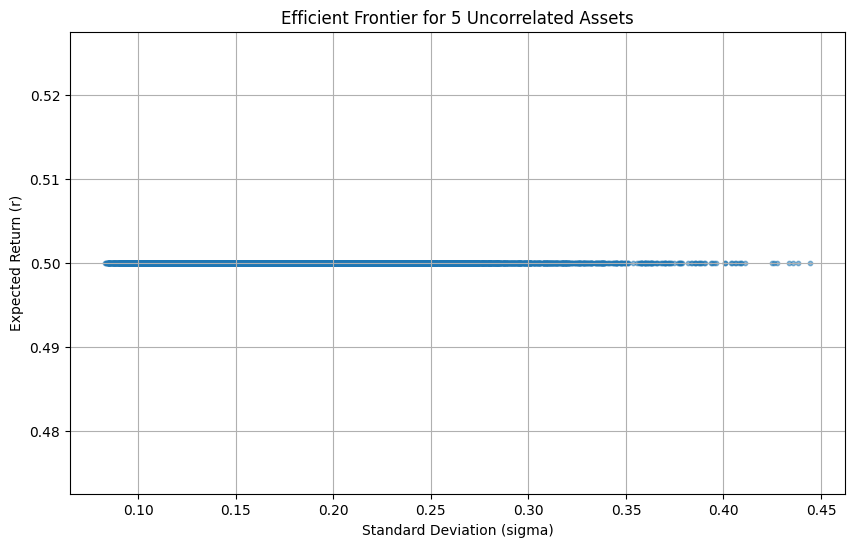

Covariance Matrix:
[[0.01 0.   0.   0.   0.  ]
 [0.   0.04 0.   0.   0.  ]
 [0.   0.   0.09 0.   0.  ]
 [0.   0.   0.   0.16 0.  ]
 [0.   0.   0.   0.   0.25]]


In [9]:
# Number of assets
n_assets = 5

# Set standard deviations for each asset
sigmas = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# Set expected returns for each asset (all equal in this case)
returns = np.array([0.5, 0.5, 0.5, 0.5, 0.5])

# Since assets are uncorrelated, covariance matrix is diagonal
# Cov(i,j) = sigma_i * sigma_j * rho_ij = 0 for i != j (uncorrelated)
# Var(i) = sigma_i^2 for i = j
cov_matrix = np.diag(sigmas**2)

def portfolio_return(weights):
    """Calculate portfolio expected return"""
    return np.dot(weights, returns)

def portfolio_variance(weights):
    """Calculate portfolio variance"""
    return np.dot(weights, np.dot(cov_matrix, weights))

def portfolio_std(weights):
    """Calculate portfolio standard deviation"""
    return np.sqrt(portfolio_variance(weights))

# Generate random portfolios for visualization
n_portfolios = 10000
np.random.seed(42)
all_weights = np.random.dirichlet(np.ones(n_assets), n_portfolios)

portfolio_returns = np.array([portfolio_return(w) for w in all_weights])
portfolio_stds = np.array([portfolio_std(w) for w in all_weights])

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_stds, portfolio_returns, alpha=0.5, s=10)
plt.xlabel('Standard Deviation (sigma)')
plt.ylabel('Expected Return (r)')
plt.title(f'Efficient Frontier for {n_assets} Uncorrelated Assets')
plt.grid(True)
plt.show()

print(f"Covariance Matrix:\n{cov_matrix}")

- (b): We would like to minimize $\frac{1}{2}\sum_1^n w_i^2\sigma_i^2$ (Minimizing the variance is the same as minimizing $1/2$ of the variance. We multiplied it by $1/2$ so that the numbers look nicer when we take derivatives) subject to the constraint $\sum_1^n w_i = 1$. 

Since the assets are uncorrelated, the variance of the portfolio is:
$$\text{Var}(r) = \text{Var}\left(\sum_1^n w_ir_i\right) = \sum_1^n w_i^2\text{Var}(r_i) = \sum_1^n w_i^2\sigma_i^2$$

Hence, we need to use the Lagrangian Multiplier method to solve this optimization problem. We construct the Lagrangian:
$$L(w_1, \ldots, w_n, \mu) = \frac{1}{2}\sum_1^n w_i^2\sigma_i^2 - \mu\left(\sum_1^n w_i - 1\right)$$

Taking the partial derivative with respect to each $w_i$ and setting it equal to zero:
$$\frac{\partial L}{\partial w_i} = w_i\sigma_i^2 - \mu = 0$$

Taking the partial derivative with respect to $\mu$ and setting it equal to zero gives us the constraint:
$$\frac{\partial L}{\partial \mu} = -\left(\sum_1^n w_i - 1\right) = 0$$

This gives us the system of equations:
$$\begin{align}w_i\sigma_i^2 &= \mu \;\;\text{for all } i \\
\sum_1^n w_i &= 1\end{align}$$

The first equation implies that $w_i = \frac{\mu}{\sigma_i^2}$ for all $i$. Substituting this into the second constraint gives:
$$\sum_1^n \frac{\mu}{\sigma_i^2} = 1 \implies \mu\left(\sum_1^n\frac{1}{\sigma_i^2}\right) = 1$$

Therefore, $\mu = \frac{1}{\sum_1^n\frac{1}{\sigma_i^2}} = \overline{\sigma}^2$. 

Now we can solve for the weights:
$$w_i = \frac{\mu}{\sigma_i^2} = \frac{\overline{\sigma}^2}{\sigma_i^2}$$

In this minimum-variance portfolio:
- The expected rate of return is $\overline{r} = \sum_1^n w_i\overline{r}' = \overline{r}'\sum_1^n w_i = \overline{r}'$
- The variance is:
$$\text{Var}(r) = \sum_1^n w_i^2\sigma_i^2 = \sum_1^n \left(\frac{\overline{\sigma}^2}{\sigma_i^2}\right)^2\sigma_i^2 = (\overline{\sigma}^2)^2\sum_1^n \frac{1}{\sigma_i^2} = (\overline{\sigma}^2)^2 \cdot \frac{1}{\overline{\sigma}^2} = \overline{\sigma}^2$$

Therefore, the minimum-variance point is $(\overline{\sigma}, \overline{r}')$, where $\overline{\sigma} = \sqrt{\overline{\sigma}^2}$.

## Exercise 6.7
(Markowitz fun) There are just three assets with rates of return $r_1$ , $r_2$, and $r_3$, respectively. The covariance matrix and the expected rates of return are
$$V = \begin{bmatrix}2 & 1 & 0 \\ 1 & 2 & 1 \\ 0 & 1 & 2\end{bmatrix},\;\;\;\;\overline{r} = \begin{bmatrix}0.4 \\ 0.8 \\ 0.8\end{bmatrix}$$

- (a) Find the minimum-variance portfolio. [Hint: By symmetry w1 = w3.] 
- (b) Find another efficient portfolio by setting $\lambda = 1, \mu = 0$. 
- (c) If the risk-free rate is $r_f = 0.2$, find the efficient portfolio of risky assets.

### Solution:
- (a): Note we need to solve the minimal variance portfolio. If we write in the matrix form:
$$V\begin{bmatrix}w_1 \\ w_2 \\ w_3\end{bmatrix} = \lambda \begin{bmatrix}\overline{r_1} \\ \overline{r_2} \\ \overline{r_3}\end{bmatrix} + \mu \begin{bmatrix}1 \\ 1 \\ 1\end{bmatrix}$$

For the minimum-variance portfolio, we want to find the portfolio that minimizes variance regardless of the expected return. This corresponds to finding the point where the efficient frontier has minimum risk. At this point, we only need to satisfy the budget constraint $\sum w_i = 1$, which means we can set $\lambda = 0$ (we're not targeting a specific return level).

With $\lambda = 0$, the system becomes:
$$V\begin{bmatrix}w_1 \\ w_2 \\ w_3\end{bmatrix} = \mu \begin{bmatrix}1 \\ 1 \\ 1\end{bmatrix}$$

Since $\mu \neq 0$, we can divide both sides by $\mu$:
$$V\begin{bmatrix}w_1 \\ w_2 \\ w_3\end{bmatrix} = \begin{bmatrix}1 \\ 1 \\ 1\end{bmatrix}$$

Expanding this system:
$$\begin{bmatrix}2 & 1 & 0 \\ 1 & 2 & 1 \\ 0 & 1 & 2\end{bmatrix}\begin{bmatrix}w_1 \\ w_2 \\ w_3\end{bmatrix} = \begin{bmatrix}1 \\ 1 \\ 1\end{bmatrix}$$

By the symmetry of the covariance matrix (and the hint), we can assume $w_1 = w_3$. This gives us:
- First equation: $2w_1 + w_2 = 1$
- Second equation: $w_1 + 2w_2 + w_3 = 1 \Rightarrow 2w_1 + 2w_2 = 1$
- Third equation: $w_2 + 2w_3 = 1$ (which is symmetric to the first)

From the second equation: $2w_1 + 2w_2 = 1 \Rightarrow w_1 + w_2 = 1/2$

From the first equation: $2w_1 + w_2 = 1$

Subtracting: $w_1 = 1/2$, which gives $w_2 = 0$ and $w_3 = 1/2$.

However, these weights don't sum to 1. We need to normalize: $w_1 = 1/2, w_2 = 0, w_3 = 1/2$ sum to 1, so they are already normalized.

The minimum-variance portfolio has expected return: $\overline{r}_p = 0.5(0.4) + 0(0.8) + 0.5(0.8) = 0.6$

The variance is: $\sigma_p^2 = w^TVw = [0.5, 0, 0.5]\begin{bmatrix}2 & 1 & 0 \\ 1 & 2 & 1 \\ 0 & 1 & 2\end{bmatrix}\begin{bmatrix}0.5 \\ 0 \\ 0.5\end{bmatrix} = [1, 0.5, 1]\begin{bmatrix}0.5 \\ 0 \\ 0.5\end{bmatrix} = 1$

- (b): For another efficient portfolio with $\lambda = 1, \mu = 0$, we solve:
$$V\begin{bmatrix}w_1 \\ w_2 \\ w_3\end{bmatrix} = \begin{bmatrix}0.4 \\ 0.8 \\ 0.8\end{bmatrix}$$

This gives us:
$$\begin{bmatrix}2 & 1 & 0 \\ 1 & 2 & 1 \\ 0 & 1 & 2\end{bmatrix}\begin{bmatrix}w_1 \\ w_2 \\ w_3\end{bmatrix} = \begin{bmatrix}0.4 \\ 0.8 \\ 0.8\end{bmatrix}$$

Solving this system: $w_1 = 0.1, w_2 = 0.2, w_3 = 0.3$ (before normalization).

These sum to $0.1 + 0.2 + 0.3 = 0.6$. After normalizing by dividing by 0.6: $w_1 = 1/6, w_2 = 1/3, w_3 = 1/2$.

The expected return is: $\overline{r}_p = \frac{1}{6}(0.4) + \frac{1}{3}(0.8) + \frac{1}{2}(0.8) = \frac{0.4 + 1.6 + 2.4}{6} = \frac{4.4}{6} = \frac{11}{15} \approx 0.733$

- (c): For the efficient portfolio of risky assets when $r_f = 0.2$, we use the one-fund theorem. We solve:
$$V\begin{bmatrix}w_1 \\ w_2 \\ w_3\end{bmatrix} = \lambda\begin{bmatrix}\overline{r_1} - r_f \\ \overline{r_2} - r_f \\ \overline{r_3} - r_f\end{bmatrix} = \lambda\begin{bmatrix}0.4 - 0.2 \\ 0.8 - 0.2 \\ 0.8 - 0.2\end{bmatrix} = \lambda\begin{bmatrix}0.2 \\ 0.6 \\ 0.6\end{bmatrix}$$

Since $\lambda \neq 0$, we can solve:
$$V\begin{bmatrix}w_1 \\ w_2 \\ w_3\end{bmatrix} = \begin{bmatrix}0.2 \\ 0.6 \\ 0.6\end{bmatrix}$$

This gives: $w_1 = 0, w_2 = 0.2, w_3 = 0.2$ (before normalization).

These sum to $0 + 0.2 + 0.2 = 0.4$. After normalizing: $w_1 = 0, w_2 = 1/2, w_3 = 1/2$.

This is the tangency portfolio of risky assets. The expected return is: $\overline{r}_p = 0(0.4) + \frac{1}{2}(0.8) + \frac{1}{2}(0.8) = 0.8$

## Exercise 6.8
(Tracking) Suppose that it is impractical to use all the assets that are incorporated into a specified portfolio (such as a given efficient portfolio). One alternative is to find the portfolio, made up of a given set of n stocks, that tracks the specified portfolio most closely, in the sense of minimizing the variance of the difference in returns.

Specifically, suppose that the target portfolio has (random) rate of return $r_M$. Suppose that there are n assets with (random) rates of return $r_1,\ldots, r_n$. We wish to find the portfolio rate of return
$$r = a_1r_1+\cdots+a_nr_n$$
(with $\sum a_i = 1$) minimizing $\text{var}(r-r_M)$

- (a) Find a set of equations for the $a_i$'s. 
- (b) Although this portfolio tracks the desired portfolio most closely in terms of variance, it may sacrifice the mean. Hence, a logical approach is to minimize the variance of the tracking error subject to achieving a given mean return. As the mean is varied, this results in a family of portfolios that are efficient in a new sense—say, tracking efficient. Find the equation for the $a_i$'s that are tracking efficient.

### Solution:
- (a) We need to minimize 
$$\begin{align}\text{Var}(r-r_M) & = \text{Cov}\left(\sum_1^n a_ir_i - r_M, \sum_1^n a_ir_i-r_M\right) \\
&= \sum_{i,j = 1}^n \text{Cov}(a_ir_i, a_jr_j) - 2\sum_1^n\text{Cov}(a_ir_i, r_M), + \text{Cov}(r_M, r_M) \\
&= \sum_{i,j = 1}^n a_ia_j\sigma_{ij} - 2\sum_1^n a_i\sigma_{iM}+\sigma_M^2\end{align}$$
subject to the constraint
$$\sum_1^n a_i = 1$$

The partial derivative of the target function respect to $a_i$ is $2\sum_{j=1}^n a_j\sigma_{ij} - 2 \sigma_{iM}$, and the gradient of the constraint function is $(1,1,\ldots, 1)$. By the Lagrange Multiplier methods, we need to solve
$$\begin{align}2\sum_{j=1}^n a_j\sigma_{ij} - 2 \sigma_{iM} &= \lambda \;\;\;\;\text{ for all }i \\
\sum_1^n a_i &= 1\end{align}$$

- (b) Assume that we would like to achieve a mean return $\overline{r}$. Then, we add an additional constraint
$$\sum_1^n a_ir_i = \overline{r}$$
whose gradient is $(r_1,r_2,\ldots, r_n)$. By the Lagrange Multiplier methods, we need to solve 
$$\begin{align}2\sum_{j=1}^n a_j\sigma_{ij} - 2 \sigma_{iM} &= \lambda + \mu r_i \;\;\;\;\text{ for all }i \\
\sum_1^n a_i &= 1 \\
\sum_1^n a_ir_i &= \overline{r} \end{align}$$

## Exercise 6.9
(Betting wheel) Consider a general betting wheel with n segments. The payoff for a 1 bet on a segment i is $A_i$. Suppose you bet an amount $B_i = 1/A_i$ on segment i for each i. Show that the amount you win is independent of the outcome of the wheel. What is the risk-free rate of return for the wheel? Apply this to the wheel in Example 6.7.

### Solution:
The amount we win is always $\frac{1}{A_i}\cdot A_i = 1$ no matter which segment the wheel lands on. The rate of return of this wheel is $r = \left(\sum_1^n \frac{1}{A_i}\right)^{-1}-1$. 

## Exercise 6.10
Derive the equation in the one fund theorem. 
Hint: $$\frac{\partial}{\partial w_i}\left(\sum_{i,j = 1}^n \sigma_{ij}w_iw_j\right)^{1/2} =  \left(\sum_{i,j = 1}^n \sigma_{ij}w_iw_j\right)^{-1/2}\sum_{j=1}^n \sigma_{ij}w_j$$

### Solution:
We need to maximize the function 
$$tan\theta = \frac{r_p-r_f}{\sigma_p} = \frac{\sum_1^n w_i(r_i - r_f)}{(\sum_{i,j=1}^n \sigma_{ij}w_iw_j)^{1/2}}$$

The partial derivative respect to $i$ of the target function is 
$$\frac{(r_i-r_f)(\sum_{i,j=1}^n \sigma_{ij}w_iw_j)^{1/2} - (\sum_{i,j=1}^n \sigma_{ij}w_iw_j)^{-1/2}(\sum_1^n \sigma_{ij}w_j)(\sum_1^n w_i(r_i-r_f))}{\sum_{i,j=1}^n \sigma_{ij}w_iw_j}$$

Denote $\alpha = (\sum_{i,j=1}^n \sigma_{ij}w_iw_j)^{1/2}$, $\beta = (\sum_1^n w_i(r_i-r_f))$. The above function becomes
$$\frac{(r_i-r_f)\alpha - \alpha^{-1}\beta(\sum_1^n \sigma_{ij}w_j)}{\alpha^2}$$

To set all the partial derivatives to be zero, we have 
$$\frac{(r_i-r_f)\alpha - \alpha^{-1}\beta(\sum_1^n \sigma_{ij}w_j)}{\alpha^2} = 0\;\;\;\;\text{ for all }i$$
which implies that 
$$(r_i-r_f) =  \alpha^{-2}\beta(\sum_1^n \sigma_{ij}w_j)\;\;\;\;\text{ for all }i$$
Denote $\lambda = \alpha^{-2}\beta$, we get the equation (6.9) in the one fund theorem. 